In [5]:
%reload_ext autoreload
%autoreload 2

import os, sys
if os.environ['USER'] == 'yitians' and 'submit' in os.uname().nodename:
    os.environ['DM21CM_DATA_DIR'] = '/data/submit/yitians/dm21cm/DM21cm'
    os.environ['DH_DIR'] = '/work/submit/yitians/darkhistory/DarkHistory'
sys.path.append('..')
sys.path.append(os.environ['DH_DIR'])

import numpy as np
from scipy import stats
from astropy.io import fits
import os, sys
import pickle
from tqdm import tqdm

from darkhistory.spec.spectrum import Spectrum
import darkhistory.physics as phys

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file('../matplotlibrc')

## 1. Deposition dependences on $n_B$, $x$

In [3]:
from dm21cm.data_loader import load_data

In [62]:
def normalize_to_minmax(arr):
    if np.ptp(arr) == 0.:
        return np.full_like(arr, 0.5)
    return (arr - np.min(arr)) / np.ptp(arr)
def normalize_to_absmax(arr):
    if np.max(np.abs(arr)) == 0.:
        return np.full_like(arr, 0.5)
    return np.abs(arr) / np.max(np.abs(arr))

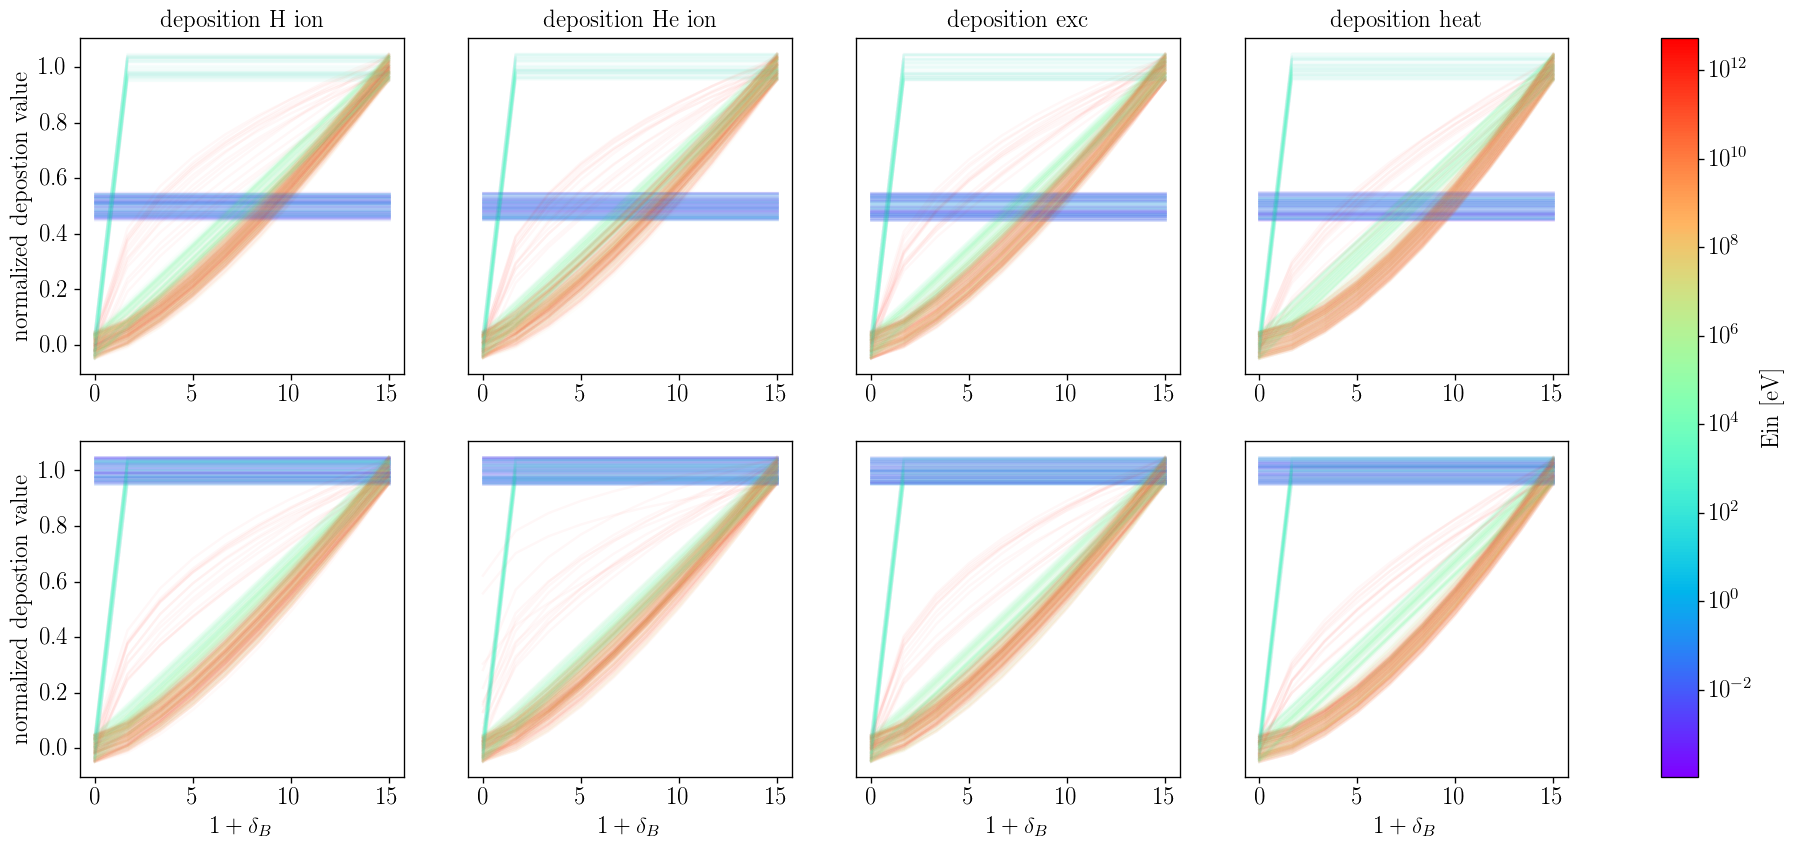

In [67]:
deptf = load_data('phot_dep')
#deptf = load_data('elec_dep')

fig, axs = plt.subplots(2, 4, figsize=(20,8))

for i_out in range(4):
    for i_x in np.arange(len(deptf.abscs['x']))[::2]:
        for i_rs in np.arange(len(deptf.abscs['rs']))[::2]:
            for i_Ein in np.arange(len(deptf.abscs['Ein']))[::40]:
                color = mpl.cm.get_cmap('rainbow')(i_Ein / len(deptf.abscs['Ein']))
                axs[0,i_out].plot(
                    deptf.abscs['nBs'],
                    normalize_to_minmax(deptf.data[i_rs, i_Ein, :, i_x, i_out]) + np.random.uniform(-0.05,0.05),
                    color=color,
                    alpha=0.03,
                )
                axs[1,i_out].plot(
                    deptf.abscs['nBs'],
                    normalize_to_absmax(deptf.data[i_rs, i_Ein, :, i_x, i_out]) + np.random.uniform(-0.05,0.05),
                    color=color,
                    alpha=0.03,
                )
    if i_out > 0:
        axs[0,i_out].set(yticks=[])
        axs[1,i_out].set(yticks=[])
    axs[0,i_out].set(title='deposition ' + deptf.abscs['out'][i_out])
    axs[1,i_out].set(xlabel=r'$1+\delta_B$')
axs[0,0].set(ylabel='normalized depostion value')
axs[1,0].set(ylabel='normalized depostion value')
norm = mpl.colors.LogNorm(vmin=np.min(deptf.abscs['Ein']), vmax=np.max(deptf.abscs['Ein']))
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.rainbow), ax=axs)
cbar.set_label('Ein [eV]')

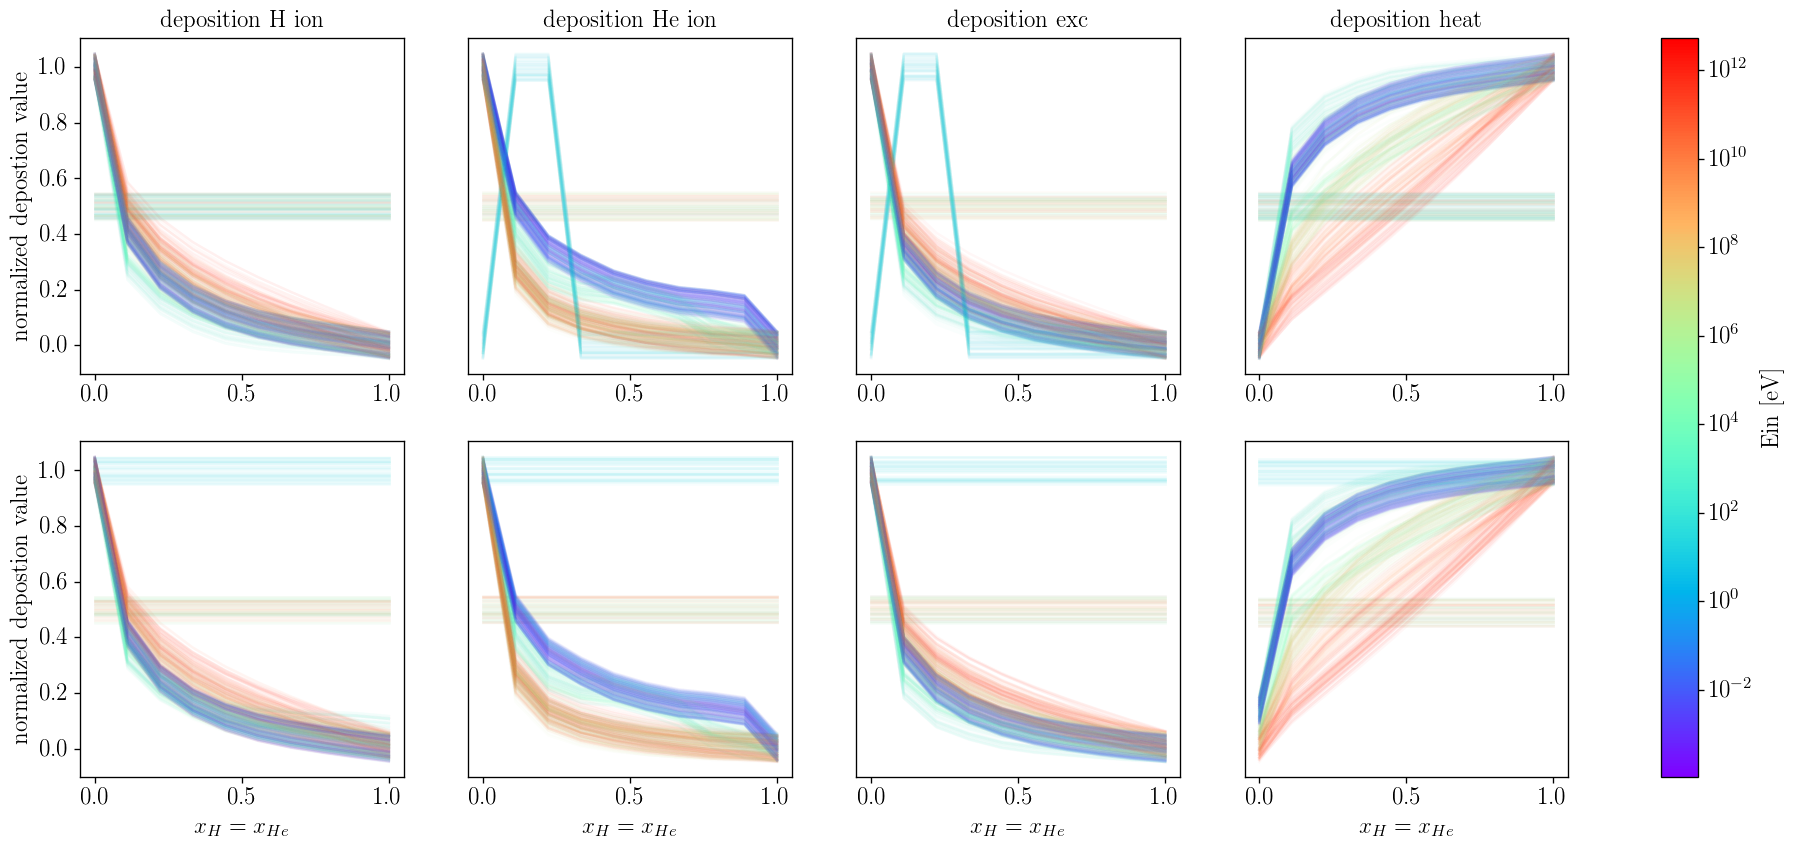

In [72]:
fig, axs = plt.subplots(2, 4, figsize=(20,8))

for i_out in range(4):
    for i_nBs in np.arange(len(deptf.abscs['nBs']))[::2]:
        for i_rs in np.arange(len(deptf.abscs['rs']))[::2]:
            for i_Ein in np.arange(len(deptf.abscs['Ein']))[::40]:
                color = mpl.cm.get_cmap('rainbow')(i_Ein / len(deptf.abscs['Ein']))
                axs[0,i_out].plot(
                    deptf.abscs['x'],
                    normalize_to_unit(deptf.data[i_rs, i_Ein, i_nBs, :, i_out]) + np.random.uniform(-0.05,0.05),
                    color=color,
                    alpha=0.03,
                )
                axs[1,i_out].plot(
                    deptf.abscs['x'],
                    normalize_to_absmax(deptf.data[i_rs, i_Ein, i_nBs, :, i_out]) + np.random.uniform(-0.05,0.05),
                    color=color,
                    alpha=0.03,
                )
    if i_out > 0:
        axs[0,i_out].set(yticks=[])
        axs[1,i_out].set(yticks=[])
    axs[0,i_out].set(title='deposition ' + deptf.abscs['out'][i_out])
    axs[1,i_out].set(xlabel=r'$x_H=x_{He}$')
axs[0,0].set(ylabel='normalized depostion value')
axs[1,0].set(ylabel='normalized depostion value')
norm = mpl.colors.LogNorm(vmin=np.min(deptf.abscs['Ein']), vmax=np.max(deptf.abscs['Ein']))
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.rainbow), ax=axs)
cbar.set_label('Ein [eV]')

### 1.1 from grid values

In [6]:
abscs_new = pickle.load(open('../data/abscissas/abscs_test.p', 'rb'))

In [7]:
phot_depgv_new = np.load('../data/tfdata/test/phot_depgv.npy')
phot_depgv_new.shape

(1, 3, 30, 500, 5)

In [18]:
abscs_new['rs']

array([15.])

In [19]:
def normalize_to_absmax(arr):
    if np.max(np.abs(arr)) == 0.:
        return np.zeros_like(arr)
    return arr / np.max(np.abs(arr))

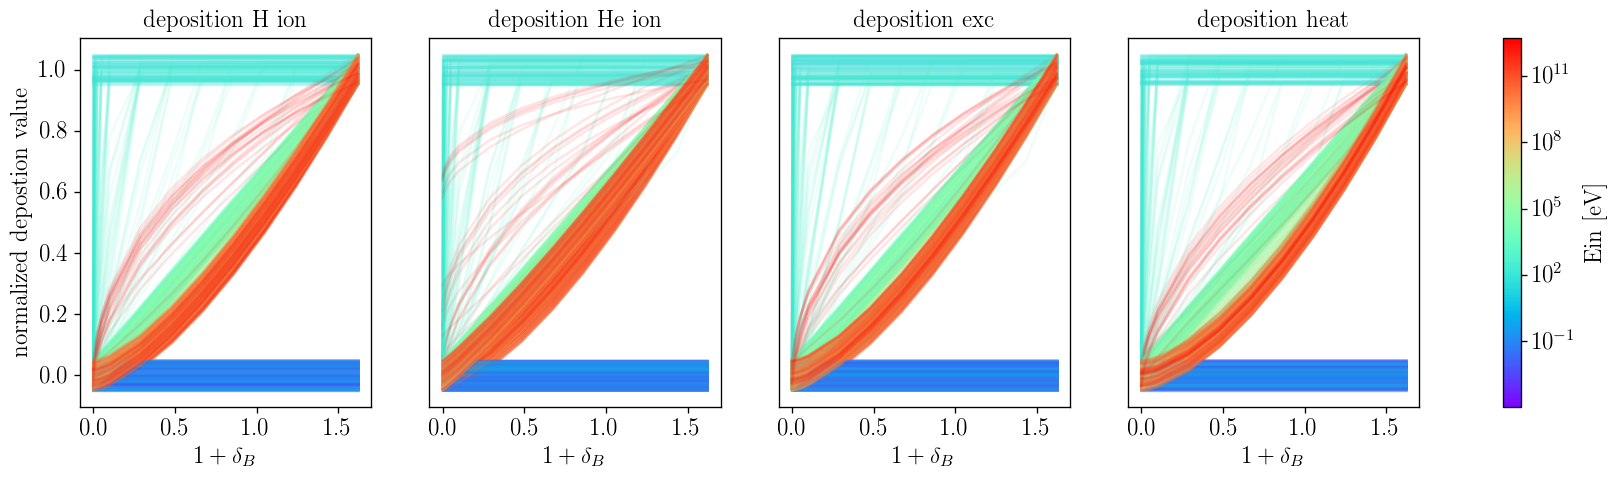

In [20]:
i_nBs_max = np.searchsorted(abscs_new['nBs'], 1.7)
alpha = 0.1
abscs = abscs_new
data = phot_depgv_new

fig, axs = plt.subplots(1, 4, figsize=(18,4))

for i_out in range(4):
    for i_x in np.arange(len(abscs['x'])):
        for i_rs in np.arange(len(abscs['rs'])):
            for i_Ein in np.arange(len(abscs['photE'])):
                color = mpl.cm.get_cmap('rainbow')(i_Ein / (len(abscs['photE'])-1))
                axs[i_out].plot(
                    abscs['nBs'][:i_nBs_max],
                    normalize_to_absmax(data[i_rs, i_x, :i_nBs_max, i_Ein, i_out]) + np.random.uniform(-0.05,0.05),
                    color=color,
                    alpha=alpha,
                )
    if i_out > 0:
        axs[i_out].set(yticks=[])
    axs[i_out].set(xlabel=r'$1+\delta_B$', title='deposition ' + abscs['dep_c'][i_out])
axs[0].set(ylabel='normalized depostion value')
norm = mpl.colors.LogNorm(vmin=np.min(abscs['photE']), vmax=np.max(abscs['photE']))
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.rainbow), ax=axs)
cbar.set_label('Ein [eV]')
plt.savefig('gas_density_dependence.pdf')

## 2. Photon transfer function $n_B$ dependence at one ($rs$, $x_{HII}$, $x_{HeII}$, $E_{in}$) point

In [4]:
# single point: low energy or high energy
z = 50 # actually 1+z
Ein = 1e5 # benchmark: 1e7 or 1e12
x = 0.5
nBs_s = np.logspace(np.log10(1e-8), np.log10(1e0), 9)
nBs_s = np.insert(nBs_s, 0, 0)
print('['+'d, '.join([f'{nBs:.10f}' for nBs in nBs_s])+'d]')

[0.0000000000d, 0.0000000100d, 0.0000001000d, 0.0000010000d, 0.0000100000d, 0.0001000000d, 0.0010000000d, 0.0100000000d, 0.1000000000d, 1.0000000000d]


In [8]:
hep_tfs = []
for i, nBs in enumerate(nBs_s):
    with fits.open(fitsfn(z, np.log10(Ein), x, nBs, base='../../data/idl_output/tmp_nBs/')) as fitsf:
        eng = fitsf[1].data['energy'][0]
        hep_tfs.append(Spectrum(eng, fitsf[1].data['photonspectrum'][0,1]/2.0, spec_type='dNdE').N)
        #lep_tf[rs_i][Ein_i] = Spectrum(photE, fitsf[1].data['lowengphot'][0,1]/2.0, spec_type='dNdE').N
        #lee_tf[rs_i][Ein_i] = Spectrum(elecE, fitsf[1].data['lowengelec'][0,1]/2.0, spec_type='dNdE').N
        #cmbloss[rs_i][Ein_i] = fitsf[1].data['cmblosstable'][0,1]/2.0
        #hed_tf[rs_i][Ein_i] = fitsf[1].data['highdeposited_grid'][0,:,1]/2.0
        #if Ein_i == nphotE-1:
        #    lowerbound[rs_i] = fitsf[1].data['lowerbound'][0,1]
hep_tfs = np.array(hep_tfs)

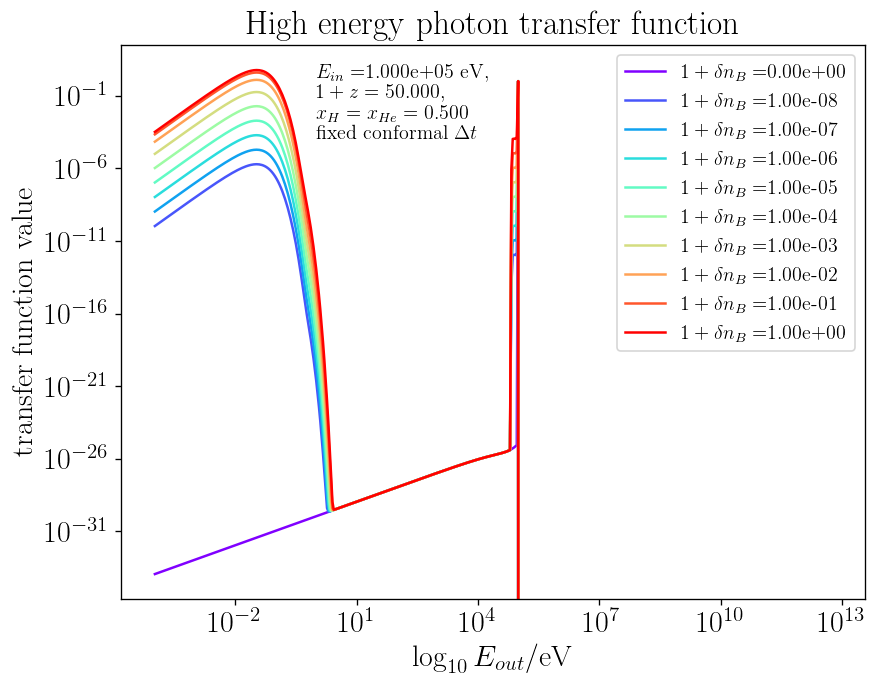

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
cmap = plt.get_cmap('rainbow')

for i, hep_tf in enumerate(hep_tfs):
    if i%1 == 0:
        ax.plot(eng, hep_tf, color=cmap(i/(len(hep_tfs)-1)), label='$1+\delta n_B=$%.2e'%nBs_s[i])
ax.set(xscale='log', yscale='log')
ax.set(title='High energy photon transfer function')
ax.set(xlabel='$\log_{10}E_{out}$/eV', ylabel='transfer function value')
ax.text(1e0, 1e-4, '$E_{in}=$%.3e eV,\n$1+z=%.3f$,\n$x_H=x_{He}=%.3f$\nfixed conformal $\Delta t$' % (Ein, z, x), fontsize=12)
ax.legend(fontsize=12);

## 1.1 Location in transfer function

In [13]:
hep_tfinterp = pickle.load(open(os.environ['DH_DATA_DIR']+'/highengphot_tf_interp.raw', 'rb'))

In [14]:
hep_tf2d = hep_tfinterp.get_tf(xH, xHe*(phys.YHe/(4*(1-phys.YHe))), 1000)

In [15]:
def plot_val(x):
    return np.flipud(np.log10(np.clip(np.abs(x), 1e-100, None)))

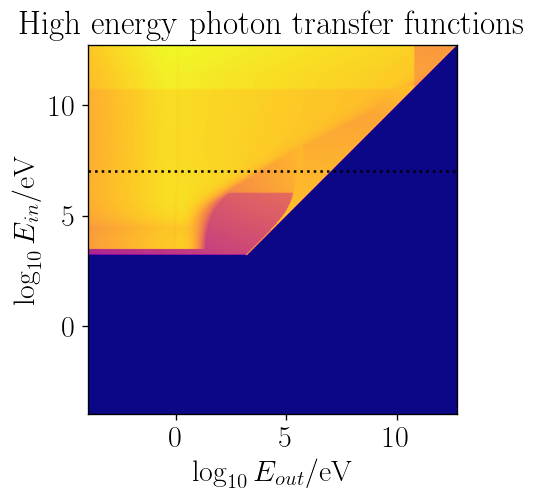

In [19]:
plt.imshow(plot_val(hep_tf2d.grid_vals), vmin=-55, cmap='plasma',
           extent=np.log10((hep_tf2d.eng[0], hep_tf2d.eng[-1], hep_tf2d.eng[0], hep_tf2d.eng[-1])))
plt.title('High energy photon transfer functions')
plt.xlabel('$\log_{10}E_{out}$/eV')
plt.ylabel('$\log_{10}E_{in}$/eV');
plt.axhline(y=np.log10(Ein), color='k', linestyle=':');

## 2. How linear is the typical gas density dependence?

### 2.1 single point

In [30]:
rvals = []
for tf_nhd in hep_tfs.transpose():
    if tf_nhd[5] > 0:
        fit_y = tf_nhd[1:]
        fit_x = (nhds+1)[1:]
        k, b, r, p, std_err = stats.linregress(fit_x, fit_y)
        rvals.append(r)
    else:
        rvals.append(np.inf)
rvals = np.array(rvals)
print('# of valid values', np.sum(rvals < np.inf))

# of valid values 478


<ipython-input-34-f150dd992ae1>:6: RuntimeWarning: invalid value encountered in true_divide
  plotvs /= plotvs[-1]
<ipython-input-34-f150dd992ae1>:12: RuntimeWarning: divide by zero encountered in log10
  plotvs = np.log10(hep_tfs)
<ipython-input-34-f150dd992ae1>:13: RuntimeWarning: invalid value encountered in subtract
  plotvs -= plotvs[0]


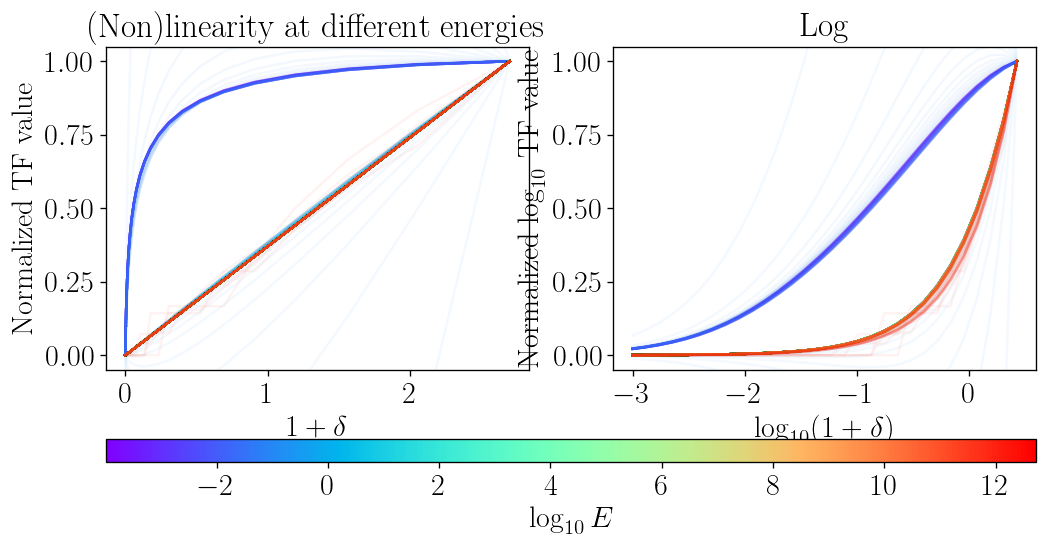

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
cmap = plt.get_cmap('rainbow')

plotvs = hep_tfs.copy()
plotvs -= plotvs[0]
plotvs /= plotvs[-1]
for i, plotv in enumerate(np.transpose(plotvs)):
    im = axs[0].plot(nhds+1, plotv, color=cmap(i/500), alpha=0.05)
axs[0].set(title='(Non)linearity at different energies', xlabel='$1+\delta$', ylabel='Normalized TF value')
axs[0].set(ylim=(-0.05, 1.05))

plotvs = np.log10(hep_tfs)
plotvs -= plotvs[0]
plotvs /= plotvs[-1]
for i, plotv in enumerate(np.transpose(plotvs)):
    axs[1].plot(np.log10((nhds+1)[1:]), plotv[1:], color=cmap(i/500), alpha=0.05)
axs[1].set(ylim=(-0.05, 1.05))
axs[1].set(title='Log', xlabel='$\log_{10}(1+\delta)$', ylabel='Normalized $\log_{10}$ TF value')

norm = mpl.colors.Normalize(vmin=np.log10(abscs['photeng'][0]),
                            vmax=np.log10(abscs['photeng'][499]))
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=axs, orientation='horizontal',
             label='$\log_{10}E$', aspect=40);

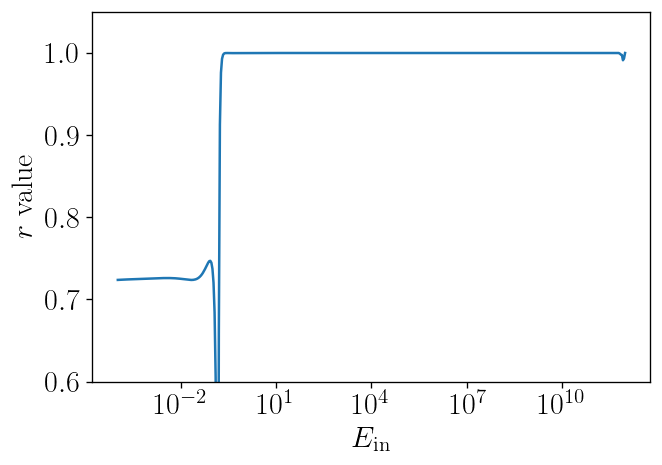

In [38]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(abscs['photeng'][rvals<np.inf], np.abs(rvals[rvals<np.inf]))
ax.set(xscale='log')
ax.set(ylim=(0.6,1.05))
ax.set(xlabel='$E_\mathrm{in}$', ylabel='$r$ value');

### 2.2 scan

In [81]:
zs   = np.logspace(np.log10(4), np.log10(50), 7) # actually 1+z
Eins = np.logspace(2, 12.7, 7)
xs   = np.array([0.01, 0.1, 0.2, 0.5, 0.8, 0.9, 0.99])
nhds = np.logspace(np.log10(0.001), np.log10(2.7), 7) - 1

In [82]:
for arr in [zs, Eins, xs, nhds]:
    print('['+'d, '.join([f'{a:.10f}' for a in arr])+'d]')

[4.0000000000d, 6.0936615158d, 9.2831776672d, 14.1421356237d, 21.5443469003d, 32.8209893973d, 50.0000000000d]
[100.0000000000d, 6072.0219569099d, 368694.5064519573d, 22387211.3856833763d, 1359356390.8785240650d, 82540418526.8017272949d, 5011872336272.7148437500d]
[0.0100000000d, 0.1000000000d, 0.2000000000d, 0.5000000000d, 0.8000000000d, 0.9000000000d, 0.9900000000d]
[-0.9990000000d, -0.9962684097d, -0.9860752335d, -0.9480384758d, -0.8061008779d, -0.2764479081d, 1.7000000000d]


In [83]:
rvals = []
c = 0
for z in zs:
    for Ein in Eins:
        for x in xs:
            c += 1
            print(f'\r{c}/343', flush=True, end='')
            hep_tfs = []
            for i, nhd in enumerate(nhds):
                with fits.open(fitsfn(z, np.log10(Ein), x, x, nhd)) as fitsf:
                    eng = fitsf[1].data['energy'][0]
                    hep_tfs.append(Spectrum(eng, fitsf[1].data['photonspectrum'][0,1]/2.0, spec_type='dNdE').N)
                    #lep_tf[rs_i][Ein_i] = Spectrum(photE, fitsf[1].data['lowengphot'][0,1]/2.0, spec_type='dNdE').N
                    #lee_tf[rs_i][Ein_i] = Spectrum(elecE, fitsf[1].data['lowengelec'][0,1]/2.0, spec_type='dNdE').N
                    #cmbloss[rs_i][Ein_i] = fitsf[1].data['cmblosstable'][0,1]/2.0
                    #hed_tf[rs_i][Ein_i] = fitsf[1].data['highdeposited_grid'][0,:,1]/2.0
                    #if Ein_i == nphotE-1:
                    #    lowerbound[rs_i] = fitsf[1].data['lowerbound'][0,1]
            hep_tfs = np.array(hep_tfs)
            for tf_nhd in np.log(hep_tfs.transpose()):
                if tf_nhd[5] > -100:
                    fit_vals = tf_nhd[1:]
                    k, b, r, p, std_err = stats.linregress(range(len(fit_vals)), fit_vals)
                    rvals.append(r)

2/343

<ipython-input-83-6917e4ef3742>:20: RuntimeWarning: divide by zero encountered in log
  for tf_nhd in np.log(hep_tfs.transpose()):


343/343

## 3. abscs for IDL

In [3]:
from dm21cm.common import abscs_nBs_test_2 as abscs

In [6]:
# for idl
for key, item in abscs.items():
    if key not in ['photE', 'elecEk', 'dep_c']:
        key_show = key if key != 'rs' else 'z'
        print(key_show+'_s_global = ['+'d, '.join([f'{v:.10f}' for v in item])+'d]')

nBs_s_global = [0.0000000000d, 1.6666666667d, 3.3333333333d, 5.0000000000d, 6.6666666667d, 8.3333333333d, 10.0000000000d, 11.6666666667d, 13.3333333333d, 15.0000000000d]
x_s_global = [0.0000100000d, 0.1111188889d, 0.2222277778d, 0.3333366667d, 0.4444455556d, 0.5555544444d, 0.6666633333d, 0.7777722222d, 0.8888811111d, 0.9999900000d]
z_s_global = [5.0000000000d, 5.8538995686d, 6.8536280319d, 8.0240900359d, 9.3944434399d, 10.9988256800d, 12.8772041807d, 15.0763719997d, 17.6511135090d, 20.6655691512d, 24.1948332679d, 28.3268248059d, 33.1644775023d, 38.8283041088d, 45.4593985345d, 53.2229506942d, 62.3123616218d, 72.9540613634d, 85.4131496688d, 100.0000000000d]


# Appendix

## A. Range of delta
Assuming $200\times200\times200$ simulation.

In [1]:
from scipy import stats

In [2]:
print(f'1/cell#: {(1/200**3):.3e}')
print(f'5 sigma: {(1-stats.norm.cdf(5)):.3e}')
print(f'6 sigma: {(1-stats.norm.cdf(6)):.3e}')

1/cell#: 1.250e-07
5 sigma: 2.867e-07
6 sigma: 9.866e-10


5 sigma not always enough, generating $\delta=0\sim1.7$ for $1+z=5\sim50$